# Librerias

In [153]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math

from glob import glob
from collections import OrderedDict
from scipy.optimize import least_squares
from scipy.optimize import curve_fit
from lmfit.models import ConstantModel, LorentzianModel

# Funciones

In [154]:
def Fe_2(x, gA_1, gA_2, gA_3, cA_1, cA_2, cA_3):

    List_centers=[0,285.280184,311.368597,381.695530,401.393523,478.209392,491.512110,550.915996,559.503618,648.675212,741.290168]
    x0_1=List_centers[2]
    x0_2=List_centers[4]
    x0_3=List_centers[6]
    x0_4=List_centers[8]
    x0_5=List_centers[9]
    x0_6=List_centers[10]

    LA_1=(-cA_1/(np.pi*gA_1))/(1+((x-x0_1)/gA_1)**2)
    LA_2=(-cA_2/(np.pi*gA_2))/(1+((x-x0_2)/gA_2)**2)
    LA_3=(-cA_3/(np.pi*gA_3))/(1+((x-x0_3)/gA_3)**2)
    LA_4=(-cA_3/(np.pi*gA_3))/(1+((x-x0_4)/gA_3)**2)
    LA_5=(-cA_2/(np.pi*gA_2))/(1+((x-x0_5)/gA_2)**2)
    LA_6=(-cA_1/(np.pi*gA_1))/(1+((x-x0_6)/gA_1)**2)
    
    sL= LA_1+LA_2+LA_3+LA_4+LA_5+LA_6+1
    
    return sL

def Fe_3(x, gB_1, gB_2, gB_3, cB_1, cB_2, cB_3):

    List_centers=[0,285.280184,311.368597,381.695530,401.393523,478.209392,491.512110,550.915996,559.503618,648.675212,741.290168]
    x0_1=List_centers[1]
    x0_2=List_centers[3]
    x0_3=List_centers[5]
    x0_4=List_centers[7]
    x0_5=List_centers[9]
    x0_6=List_centers[10]

    LB_1=(-cB_1/(np.pi*gB_1))/(1+((x-x0_1)/gB_1)**2)
    LB_2=(-cB_2/(np.pi*gB_2))/(1+((x-x0_2)/gB_2)**2)
    LB_3=(-cB_3/(np.pi*gB_3))/(1+((x-x0_3)/gB_3)**2)
    LB_4=(-cB_3/(np.pi*gB_3))/(1+((x-x0_4)/gB_3)**2)
    LB_5=(-cB_2/(np.pi*gB_2))/(1+((x-x0_5)/gB_2)**2)
    LB_6=(-cB_1/(np.pi*gB_1))/(1+((x-x0_6)/gB_1)**2)
    
    sL= LB_1+LB_2+LB_3+LB_4+LB_5+LB_6+1
    
    return sL

def suma_Lorenzianas(x, gA_1, gA_2, gA_3, gB_1, gB_2, gB_3, cA_1, cA_2, cA_3, cB_1, cB_2, cB_3):
    
    List_centers=[0,285.280184,311.368597,381.695530,401.393523,478.209392,491.512110,550.915996,559.503618,648.675212,741.290168]
    
    x0_1_A=List_centers[1]
    x0_1_B=List_centers[2]

    x0_2_A=List_centers[3]
    x0_2_B=List_centers[4]

    x0_3_A=List_centers[5]
    x0_3_B=List_centers[6]

    x0_4_A=List_centers[7]
    x0_4_B=List_centers[8]

    x0_5=List_centers[9]
    x0_6=List_centers[10]

    LA_1=-(cA_1/(np.pi*gA_1))/(1+((x-x0_1_A)/gA_1)**2)
    LA_2=-(cA_2/(np.pi*gA_2))/(1+((x-x0_2_A)/gA_2)**2)
    LA_3=-(cA_3/(np.pi*gA_3))/(1+((x-x0_3_A)/gA_3)**2)
    LA_4=-(cA_3/(np.pi*gA_3))/(1+((x-x0_4_A)/gA_3)**2)

    LB_1=-(cB_1/(np.pi*gB_1))/(1+((x-x0_1_B)/gB_1)**2)
    LB_2=-(cB_2/(np.pi*gB_2))/(1+((x-x0_2_B)/gB_2)**2)
    LB_3=-(cA_3/(np.pi*gB_3))/(1+((x-x0_3_B)/gB_3)**2)
    LB_4=-(cA_3/(np.pi*gB_3))/(1+((x-x0_4_B)/gB_3)**2)

    LA_5=-(cA_2/(np.pi*gA_2))/(1+((x-x0_5)/gA_2)**2)
    LA_6=-(cA_1/(np.pi*gA_1))/(1+((x-x0_6)/gA_1)**2)
    
    LB_5=-(cB_2/(np.pi*gB_2))/(1+((x-x0_5)/gB_2)**2)
    LB_6=-(cB_1/(np.pi*gB_1))/(1+((x-x0_6)/gB_1)**2)

    sL=LA_1+LA_2+LA_3+LA_4+LA_5+LA_6+LB_1+LB_2+LB_3+LB_4+LB_5+LB_6+1

    return sL

# Datos

In [155]:
Rutas=glob('D:\Genaro\Experimentos Cuanticos II\Exp.-Cuanticos-II\TP2- Mossbauer\Datos - TP2\*.counts')

Fe=pd.read_csv(Rutas[0], header=None, names=['cuentas'])
Mag=pd.read_csv(Rutas[1], header=None, names=['cuentas'])
Ox=pd.read_csv('D:\Genaro\Experimentos Cuanticos II\Exp.-Cuanticos-II\TP2- Mossbauer\Datos - TP2\FeOx_desconocido.aa006.dat',sep='\s+', header=None, names=['Vel', 'Cuentas'])

canales=np.arange(0,2048,1)
Esp_Fe=Fe['cuentas']
Esp_Mag=Mag['cuentas']
Ox_vel=Ox['Vel']
Ox_Cuentas=Ox['Cuentas']

In [156]:
List_dif=[]

for j in range(0,100):

    R=(np.array(Esp_Fe[j:1024])-np.flip(np.array(Esp_Fe[1024+j:2048])))**2

    List_dif.append(sum(R))

print(np.nonzero(List_dif==min(List_dif)))

FP=4

Esp_P_Fe=(np.flip(np.array(Esp_Fe[FP:1024]))+np.array(Esp_Fe[1024+FP:2048]))/2
Esp_P_Mag=(np.flip(np.array(Esp_Mag[FP:1024]))+np.array(Esp_Mag[1024+FP:2048]))/2


Esp_P_Mag_norm=Esp_P_Mag/max(Esp_P_Mag)
Esp_P_Fe_norm=Esp_P_Fe/max(Esp_P_Fe)

Canales_P=np.arange(0, len(Esp_P_Fe), 1)

(array([4], dtype=int64),)


# Analisis

## Calibracion

### Espectro Fe

In [157]:
velo = Canales_P # Energy or frequency axis
signal = Esp_P_Fe_norm # Intensity or counts

# Define the model: constant background + Lorentzian peaks
model = ConstantModel() + LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_') + LorentzianModel(prefix='p3_') + LorentzianModel(prefix='p4_') + LorentzianModel(prefix='p5_') + LorentzianModel(prefix='p6_')

# Set initial parameters for the model
params = model.make_params(c=25000, # Background constant
                           p1_center=355, p1_sigma=10, p1_amplitude=-10000, # Peak 1
                           p2_center=420, p2_sigma=10, p2_amplitude=-10000, # Peak 2
                           p3_center=500, p3_sigma=10, p3_amplitude=-10000, # Peak 1
                           p4_center=530, p4_sigma=10, p4_amplitude=-10000, # Peak 2
                           p5_center=600, p5_sigma=10, p5_amplitude=-10000, # Peak 1
                           p6_center=670, p6_sigma=10, p6_amplitude=-10000) # Peak 2

# Fit the model to the data
out = model.fit(signal, params, x=velo)

# Print the fit report
print(out.fit_report())

# Plot the data and the best fit
plt.plot(velo, signal, 'o', label='data', color='Purple')
plt.plot(velo, out.best_fit, label='fit', color='gold')
plt.title('Espectograma Mossbauer - Fe')
plt.xlabel('Canales')
plt.ylabel('Cuentas')
plt.legend()

plt.savefig('Mossbauer-Fe.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.close()

[[Model]]
    ((((((Model(constant) + Model(lorentzian, prefix='p1_')) + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_')) + Model(lorentzian, prefix='p5_')) + Model(lorentzian, prefix='p6_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 247
    # data points      = 1020
    # variables        = 19
    chi-square         = 0.01005442
    reduced chi-square = 1.0044e-05
    Akaike info crit   = -11719.8466
    Bayesian info crit = -11626.2230
    R-squared          = 0.99273324
[[Variables]]
    c:             0.99173395 +/- 1.1467e-04 (0.01%) (init = 25000)
    p1_amplitude: -3.33041125 +/- 0.02395951 (0.72%) (init = -10000)
    p1_center:     352.397351 +/- 0.02985221 (0.01%) (init = 355)
    p1_sigma:      4.27824959 +/- 0.04286747 (1.00%) (init = 10)
    p2_amplitude: -2.48943664 +/- 0.02262567 (0.91%) (init = -10000)
    p2_center:     417.080822 +/- 0.03404794 (0.01%) (init = 420)
    p2_sigma:   

## Espectro Ox

In [169]:
Ox_Cuentas_norm=Ox_Cuentas/max(Ox_Cuentas)

velo = Ox_vel # Energy or frequency axis
signal = Ox_Cuentas_norm # Intensity or counts

# Define the model: constant background + Lorentzian peaks
model = ConstantModel() + LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_') + LorentzianModel(prefix='p3_') + LorentzianModel(prefix='p4_') + LorentzianModel(prefix='p5_') + LorentzianModel(prefix='p6_')

# Set initial parameters for the model
params = model.make_params(c=25000, # Background constant
                           p1_center=-7, p1_sigma=2, p1_amplitude=-3e6, # Peak 1
                           p2_center=-4, p2_sigma=2, p2_amplitude=-3e6, # Peak 2
                           p3_center=-1, p3_sigma=2, p3_amplitude=-3e6, # Peak 1
                           p4_center=2, p4_sigma=2, p4_amplitude=-3e6, # Peak 2
                           p5_center=5, p5_sigma=2, p5_amplitude=-3e6, # Peak 1
                           p6_center=9, p6_sigma=2, p6_amplitude=-3e6) # Peak 2

# Fit the model to the data
out = model.fit(signal, params, x=velo)

# Print the fit report
print(out.fit_report())

# Plot the data and the best fit
plt.plot(velo, signal, 'o', label='data', color='orange')
plt.plot(velo, out.best_fit, label='fit', color='deepskyblue')
plt.title('Espectograma Mossbauer - Oxido Fe')
plt.xlabel('velocidades [mm/s]')
plt.ylabel('Cuentas')
plt.legend()

plt.savefig('Mossbauer-Ox.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.close()

[[Model]]
    ((((((Model(constant) + Model(lorentzian, prefix='p1_')) + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_')) + Model(lorentzian, prefix='p5_')) + Model(lorentzian, prefix='p6_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 569
    # data points      = 512
    # variables        = 19
    chi-square         = 0.00580808
    reduced chi-square = 1.1781e-05
    Akaike info crit   = -5792.05719
    Bayesian info crit = -5711.52902
    R-squared          = 0.99220094
[[Variables]]
    c:             0.99832632 +/- 1.9271e-04 (0.02%) (init = 25000)
    p1_amplitude: -0.12772202 +/- 0.00131702 (1.03%) (init = -3000000)
    p1_center:    -7.99410935 +/- 0.00179632 (0.02%) (init = -7)
    p1_sigma:      0.18367817 +/- 0.00260757 (1.42%) (init = 2)
    p2_amplitude: -0.09405938 +/- 0.00124175 (1.32%) (init = -3000000)
    p2_center:    -4.30304225 +/- 0.00208647 (0.05%) (init = -4)
    p2_sigma:   

$B=v6-v1 \\
\delta= \frac{v1+v2+v5+v6}{4}\\
\epsilon=\frac{v1+v6-v2-v5}{4}\\
a=\frac{v4-v3}{2B}\\
b=\frac{v5-v2}{2B}\\
\Delta=2*\epsilon$


In [159]:
center_Ox= [-7.99410922, -4.30304224, -0.81620204, 1.77334151, 5.25709837, 8.52320421]
center_Ox_err=[0.00179633, 0.00208647, 0.00306473, 0.00307986, 0.00212875, 0.00180354]

In [160]:
B_Ox=center_Ox[5]-center_Ox[0]
delta_Ox=(center_Ox[0]+center_Ox[1]+center_Ox[4]+center_Ox[5])/4
epsilon_Ox=(center_Ox[0]+center_Ox[5]-center_Ox[1]-center_Ox[4])/4
Delta_Ox=2*epsilon_Ox
a_Ox=(center_Ox[4]-center_Ox[1])/(2*B_Ox)
b_Ox=(center_Ox[3]-center_Ox[2])/(2*B_Ox)

print('Campo Hiperfino Oxido: ', B_Ox, '[mm/s]')
print('Corrimiento isomeerico' , delta_Ox, '[mm/s]')
print('Epsilon' , epsilon_Ox, '[mm/s]')
print('Delta' , Delta_Ox, '[mm/s]')
print('a' , a_Ox, '[Ad]')
print('b' , b_Ox, '[Ad]')

Campo Hiperfino Oxido:  16.51731343 [mm/s]
Corrimiento isomeerico 0.3707877799999997 [mm/s]
Epsilon -0.10624028500000016 [mm/s]
Delta -0.2124805700000003 [mm/s]
a 0.28939756609074646 [Ad]
b 0.07838876343221392 [Ad]


## Espectro Mag

In [161]:
velo = Canales_P # Energy or frequency axis
signal = Esp_P_Mag_norm # Intensity or counts

# Define the model: constant background + Lorentzian peaks
model = ConstantModel() + LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_') + LorentzianModel(prefix='p3_') + LorentzianModel(prefix='p4_') + LorentzianModel(prefix='p5_') + LorentzianModel(prefix='p6_') + LorentzianModel(prefix='p7_') + LorentzianModel(prefix='p8_') + LorentzianModel(prefix='p9_') + LorentzianModel(prefix='p10_') 

# Set initial paerametrs for the model
params = model.make_params(c=1, # Background constant
                           p1_center=280, p1_sigma=10, p1_amplitude=-10000, # Peak 1
                           p2_center=305, p2_sigma=10, p2_amplitude=-10000, # Peak 2
                           p3_center=380, p3_sigma=10, p3_amplitude=-10000, # Peak 3
                           p4_center=400, p4_sigma=10, p4_amplitude=-10000, # Peak 4
                           p5_center=475, p5_sigma=10, p5_amplitude=-10000, # Peak 5
                           p6_center=490, p6_sigma=10, p6_amplitude=-10000, # Peak 6
                           p7_center=550, p7_sigma=10, p7_amplitude=-10000, # Peak 7
                           p8_center=560, p8_sigma=10, p8_amplitude=-10000, # Peak 8
                           p9_center=650, p9_sigma=10, p9_amplitude=-10000, # Peak 9
                           p10_center=740, p10_sigma=10, p10_amplitude=-10000) # Peak 10

# Fit the model to the data
out = model.fit(signal, params, x=velo)

# Print the fit report
print(out.fit_report())

# Plot the data and the best fit
plt.plot(velo, signal, 'o', label='data', color='firebrick')
plt.plot(velo, out.best_fit, label='fit', color='Navy')
plt.title('Espectograma Mossbauer - Mag')
plt.xlabel('Canales')
plt.ylabel('Cuentas')
plt.legend()

plt.savefig('Mossbauer-Mag.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.close()

[[Model]]
    ((((((((((Model(constant) + Model(lorentzian, prefix='p1_')) + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_')) + Model(lorentzian, prefix='p5_')) + Model(lorentzian, prefix='p6_')) + Model(lorentzian, prefix='p7_')) + Model(lorentzian, prefix='p8_')) + Model(lorentzian, prefix='p9_')) + Model(lorentzian, prefix='p10_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 355
    # data points      = 1020
    # variables        = 31
    chi-square         = 5.2887e-04
    reduced chi-square = 5.3476e-07
    Akaike info crit   = -14699.7659
    Bayesian info crit = -14547.0116
    R-squared          = 0.99386702
[[Variables]]
    c:              0.99862978 +/- 2.8390e-05 (0.00%) (init = 1)
    p1_amplitude:  -0.37669898 +/- 0.00548094 (1.45%) (init = -10000)
    p1_center:      285.280183 +/- 0.04940963 (0.02%) (init = 280)
    p1_sigma:       3.71135858 +/- 0.07355224 (1.98%) (init = 10)
    p2

In [162]:
picos_Mag=np.array([285.280184 ,311.368597 ,381.695530 ,401.393523 ,478.209392 ,491.512110 ,550.915996 ,559.503618 ,648.675212 ,741.290168])
err_picos_Mag=np.array([0.04940912,0.04908872,0.06754661,0.04596920,0.15649587,0.09847705,0.20367163,0.12923891,0.03469349,0.02559156])

C:\Users\vanin\AppData\Local\Temp\ipykernel_6892\239270499.py:3: OptimizeWarning: Covariance of the parameters could not be estimated
  pop_mags_comp, cov_mags_comp= curve_fit(suma_Lorenzianas, Canales_P, Esp_P_Mag_norm, p0=gammas_amps)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


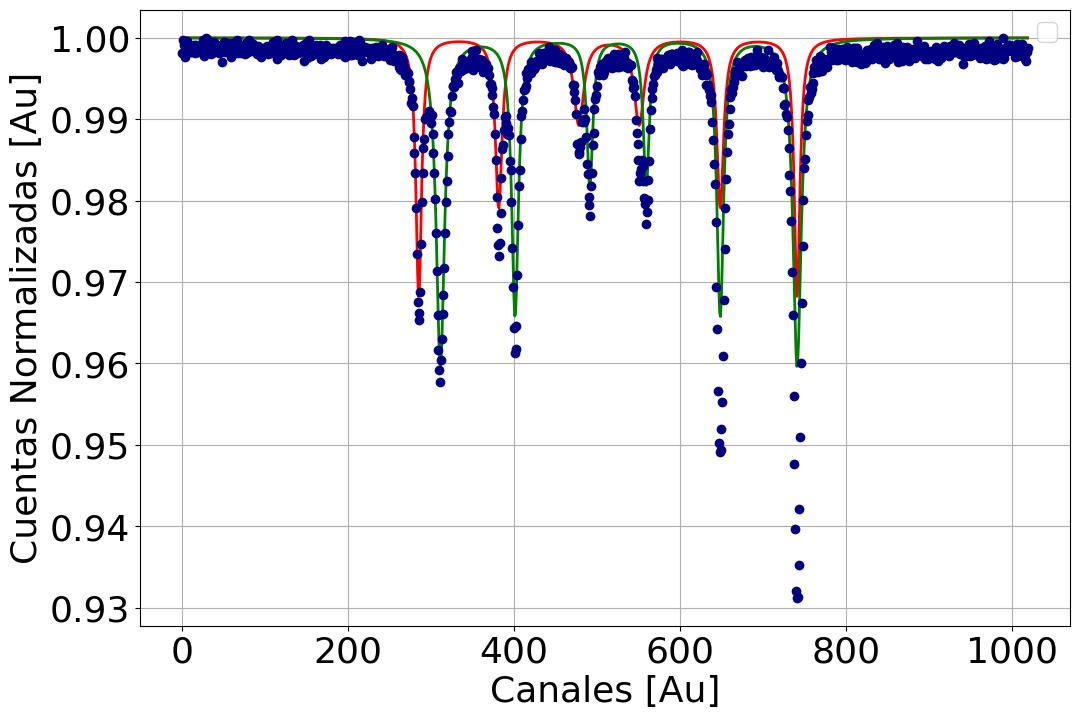

In [163]:
gammas_amps=[3.71135858,5.63721025,3.73751396,4.14555993,3.94680906,4.23503274, 0.37669898,0.71192466,0.27999969,0.48130651,0.13968512,0.24866586]

pop_mags_comp, cov_mags_comp= curve_fit(suma_Lorenzianas, Canales_P, Esp_P_Mag_norm, p0=gammas_amps)

p1=pop_mags_comp[0:3]
c1=pop_mags_comp[6:9]
p2=pop_mags_comp[3:6]
c2=pop_mags_comp[9:12]

pop_1= np.concatenate((p1, c1), axis=None)
pop_2= np.concatenate((p2, c2), axis=None)

plt.figure(figsize=(12,8))

plt.errorbar(Canales_P, Esp_P_Mag_norm, fmt='o', color='navy')
#plt.plot(Canales_P, suma_Lorenzianas(Canales_P, *pop_mags_comp), color='blue')
plt.plot(Canales_P, Fe_3(Canales_P, *pop_1), color='red',linewidth=2)
plt.plot(Canales_P, Fe_2(Canales_P, *pop_2), color='green',linewidth=2)
plt.xlabel('Canales [Au]', fontsize=26)
plt.ylabel('Cuentas Normalizadas [Au]', fontsize=26)
plt.grid()
plt.legend(fontsize=18)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.savefig('Lorentzianas.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.show()

In [164]:
B_Ox=center_Ox[5]-center_Ox[0]
delta_Ox=(center_Ox[0]+center_Ox[1]+center_Ox[4]+center_Ox[5])/4
epsilon_Ox=(center_Ox[0]+center_Ox[5]-center_Ox[1]-center_Ox[4])/4
Delta_Ox=2*epsilon_Ox
a_Ox=(center_Ox[4]-center_Ox[1])/(2*B_Ox)
b_Ox=(center_Ox[3]-center_Ox[2])/(2*B_Ox)

print('Campo Hiperfino Oxido: ', B_Ox, '[mm/s]')
print('Corrimiento isomeerico' , delta_Ox, '[mm/s]')
print('Epsilon' , epsilon_Ox, '[mm/s]')
print('Delta' , Delta_Ox, '[mm/s]')
print('a' , a_Ox, '[Ad]')
print('b' , b_Ox, '[Ad]')

Campo Hiperfino Oxido:  16.51731343 [mm/s]
Corrimiento isomeerico 0.3707877799999997 [mm/s]
Epsilon -0.10624028500000016 [mm/s]
Delta -0.2124805700000003 [mm/s]
a 0.28939756609074646 [Ad]
b 0.07838876343221392 [Ad]


In [165]:
B_Ox=center_Ox[5]-center_Ox[0]
delta_Ox=(center_Ox[0]+center_Ox[1]+center_Ox[4]+center_Ox[5])/4
epsilon_Ox=(center_Ox[0]+center_Ox[5]-center_Ox[1]-center_Ox[4])/4
Delta_Ox=2*epsilon_Ox
a_Ox=(center_Ox[4]-center_Ox[1])/(2*B_Ox)
b_Ox=(center_Ox[3]-center_Ox[2])/(2*B_Ox)

print('Campo Hiperfino Oxido: ', B_Ox, '[mm/s]')
print('Corrimiento isomeerico' , delta_Ox, '[mm/s]')
print('Epsilon' , epsilon_Ox, '[mm/s]')
print('Delta' , Delta_Ox, '[mm/s]')
print('a' , a_Ox, '[Ad]')
print('b' , b_Ox, '[Ad]')

Campo Hiperfino Oxido:  16.51731343 [mm/s]
Corrimiento isomeerico 0.3707877799999997 [mm/s]
Epsilon -0.10624028500000016 [mm/s]
Delta -0.2124805700000003 [mm/s]
a 0.28939756609074646 [Ad]
b 0.07838876343221392 [Ad]
